# Overview

This notebook demonstrates how to calculate and update the Matrix Profile for a sample dataset (this is the same example signal used in https://github.com/aouyang1/go-matrixprofile)

# Load Libraries

In [1]:
from matrixprofile import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load and visualize sample data

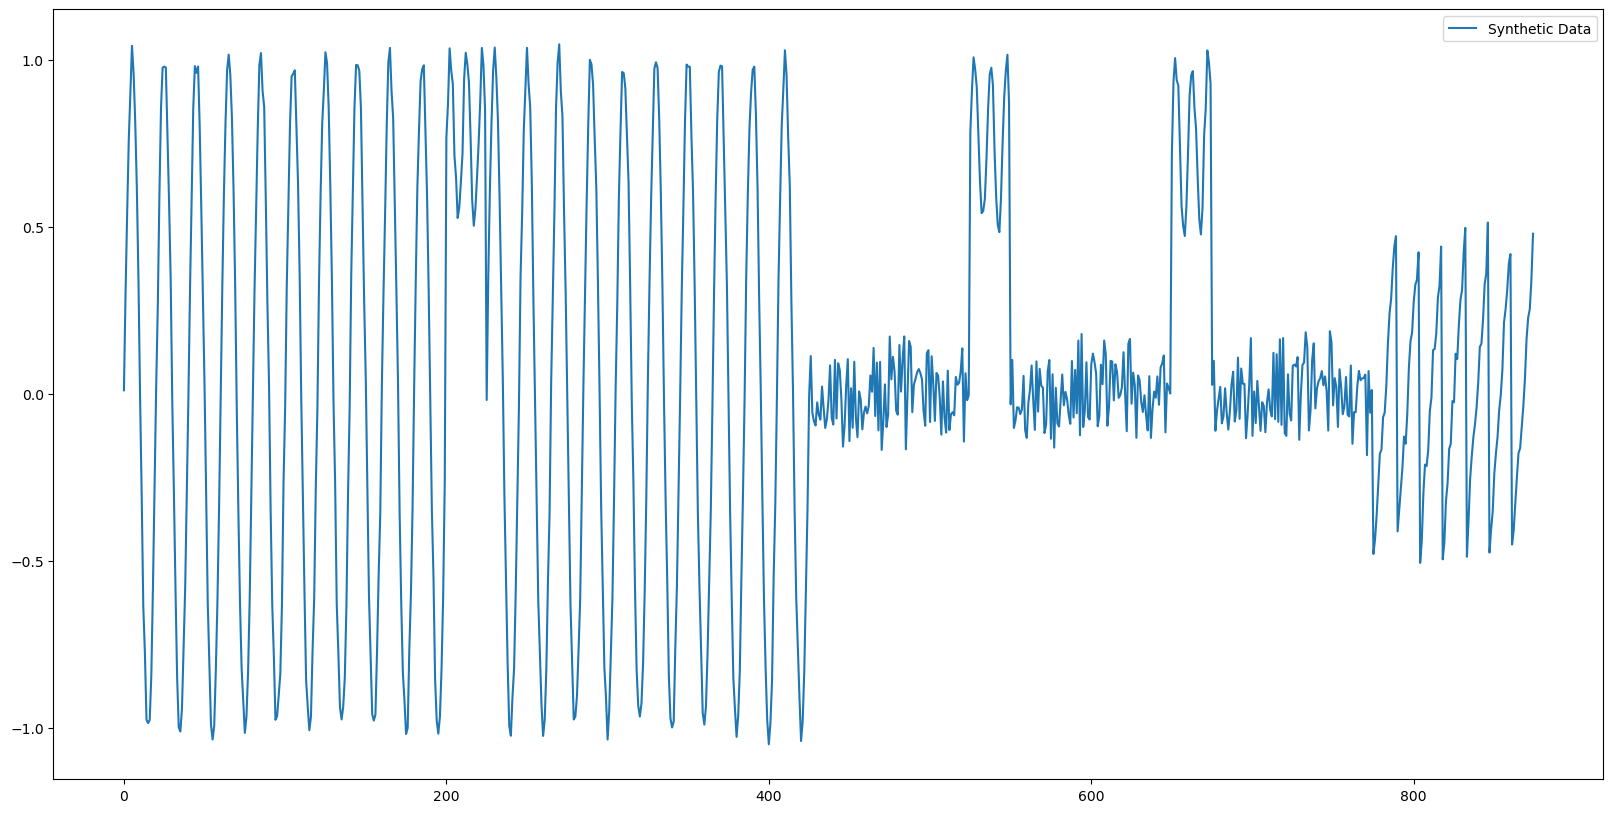

In [2]:
data = pd.read_csv("rawdata.csv")
pattern = data.data.values

#Plot data
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
legend = ax1.legend(loc='upper right')

# Calculate the Matrix Profile

In [3]:
m = 32
v = 1
mp = matrixProfile.stmp(pattern, m, v)

# Bonus: calculate the corrected arc curve (CAC) to do semantic segmantation.
#cac = fluss.fluss(mp[1], m)

Text(0.5, 0, 'Sample')

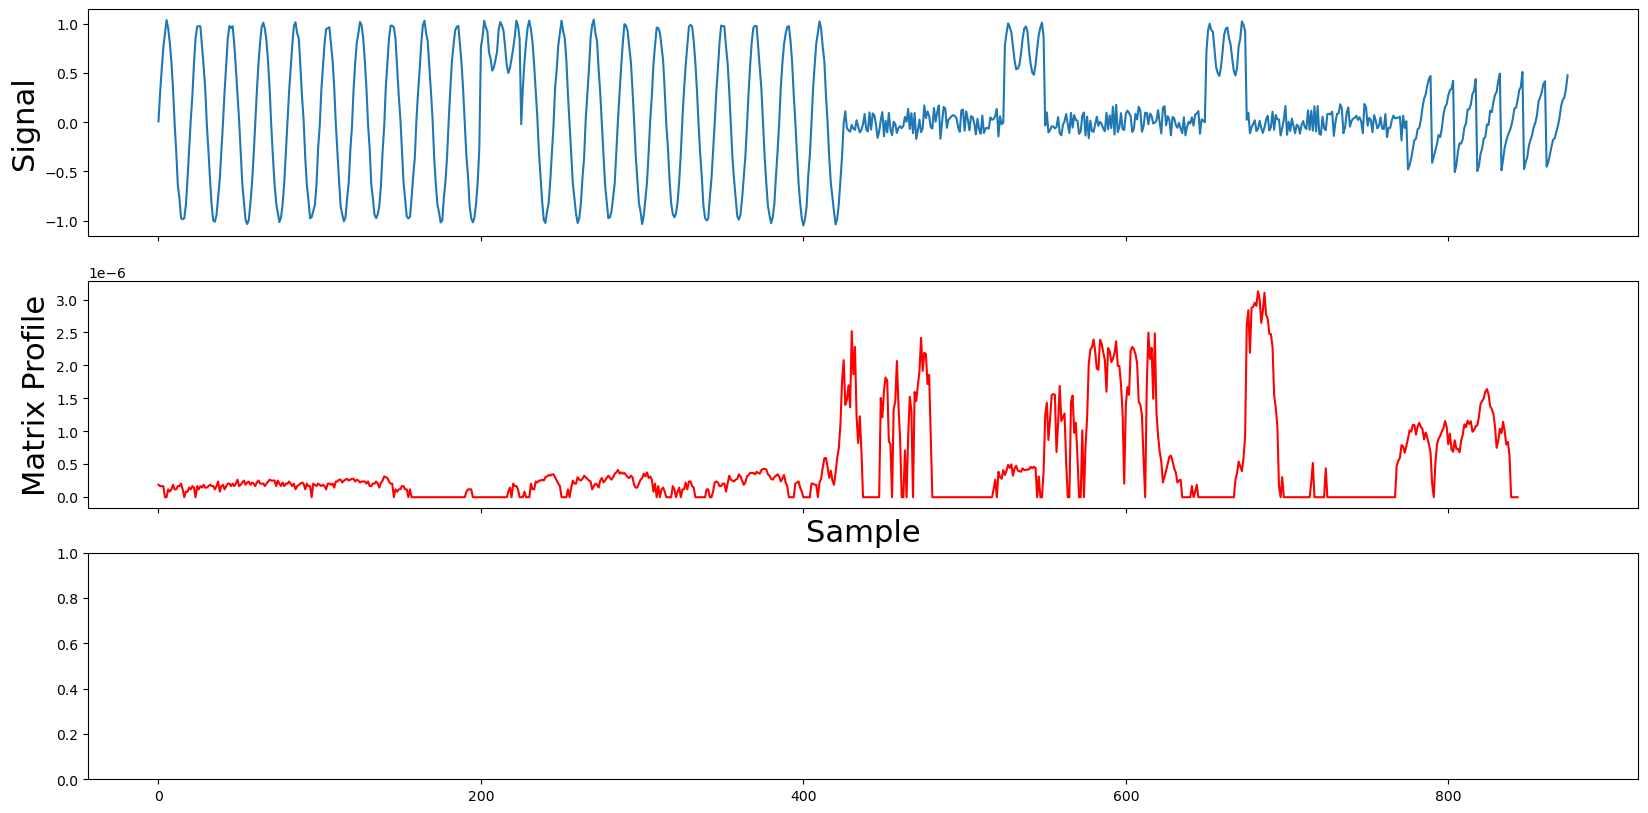

In [4]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

#Plot the CAC
#ax3.plot(np.arange(len(cac)),cac, label="CAC", color='green')
#ax3.set_ylabel('CAC', size=22)
#ax3.set_xlabel('Sample', size=22)


In [5]:
m = 32
v = 2
mp, mpi = matrixProfile.stmp(pattern, m, v)

# Bonus: calculate the corrected arc curve (CAC) to do semantic segmantation.
#cac = fluss.fluss(mp_BOH[1], m)

c:\users\saran\onedrive\desktop\università\magistrale\time series analysis\project\matrixprofile-ts\matrixprofile\distanceProfile.py:67: RuntimeWarning: invalid value encountered in sqrt
  distanceProfile = np.real(np.sqrt(mass(query,tsB,v).astype(complex)))


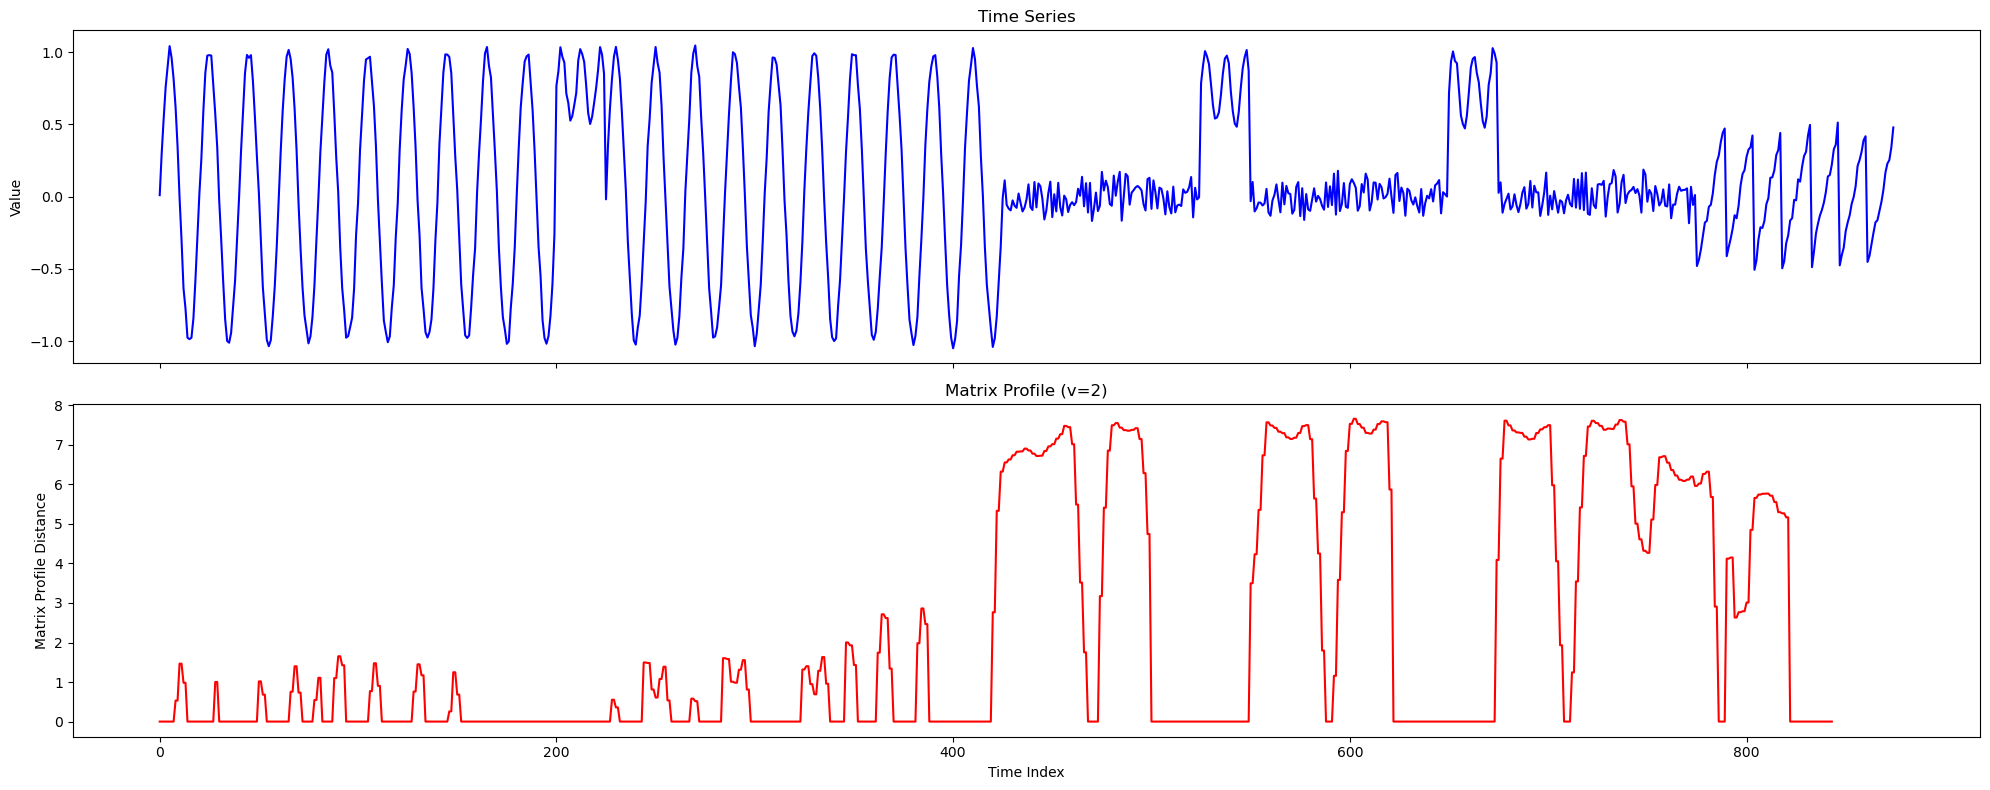

In [6]:
# Creiamo un array di NaN per full length
mp_full = np.full_like(mp, np.nan)
valid_indices = np.arange(0, len(mp), v)

# Copiamo i valori validi
mp_full[valid_indices] = mp[valid_indices]

# Sostituisci NaN con valore precedente per linea continua
mp_filled = mp_full.copy()
for i in range(1, len(mp_filled)):
    if np.isnan(mp_filled[i]):
        mp_filled[i] = mp_filled[i-1]

# Plot
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(20,8))
ax1.plot(pattern, color='blue')
ax1.set_ylabel("Value")
ax1.set_title("Time Series")

ax2.plot(mp_filled, 'r-')  # linea continua con valori "scalini"
ax2.set_ylabel("Matrix Profile Distance")
ax2.set_title(f"Matrix Profile (v={v})")
ax2.set_xlabel("Time Index")

plt.tight_layout()
plt.show()


In [7]:
m = 32
v = 3
mp,mpi= matrixProfile.stmp(pattern, m, v)

# Calcola la CAC usando la lunghezza originale per la segmentazione
#cac = fluss.fluss(mpi, m)

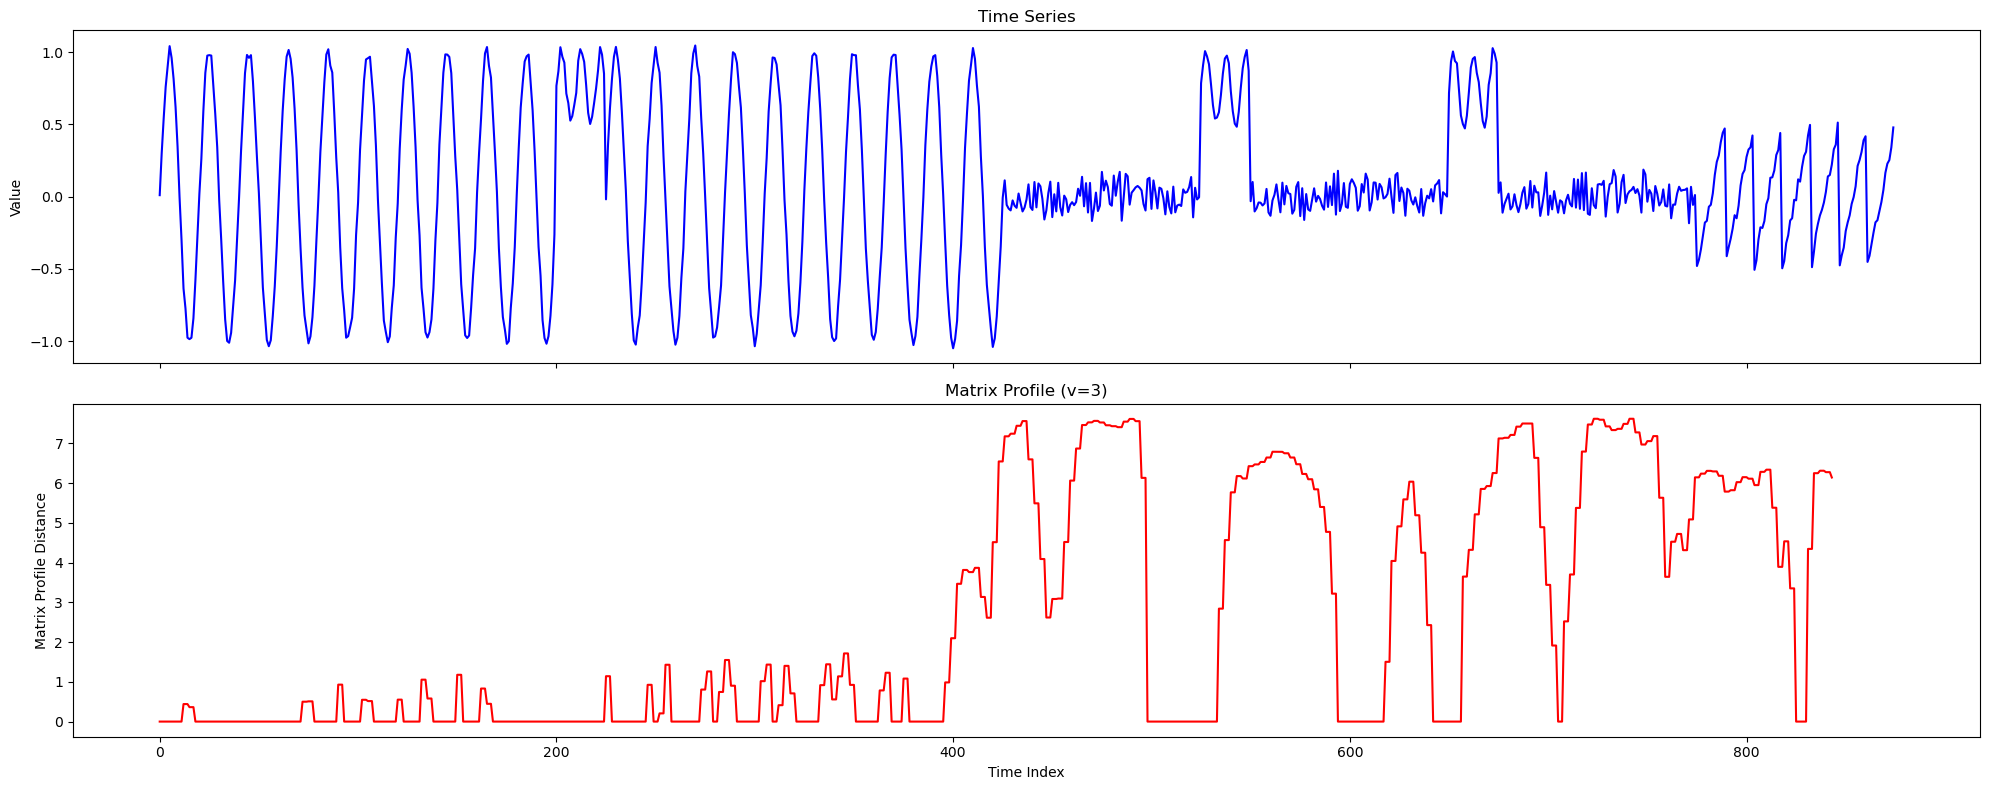

In [8]:
# Creiamo un array di NaN per full length
mp_full = np.full_like(mp, np.nan)
valid_indices = np.arange(0, len(mp), v)

# Copiamo i valori validi
mp_full[valid_indices] = mp[valid_indices]

# Sostituisci NaN con valore precedente per linea continua
mp_filled = mp_full.copy()
for i in range(1, len(mp_filled)):
    if np.isnan(mp_filled[i]):
        mp_filled[i] = mp_filled[i-1]

# Plot
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(20,8))
ax1.plot(pattern, color='blue')
ax1.set_ylabel("Value")
ax1.set_title("Time Series")

ax2.plot(mp_filled, 'r-')  # linea continua con valori "scalini"
ax2.set_ylabel("Matrix Profile Distance")
ax2.set_title(f"Matrix Profile (v={v})")
ax2.set_xlabel("Time Index")

plt.tight_layout()
plt.show()